In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
f = pd.read_csv("../data/bills.csv")
f.dropna()
print(f.head())

    bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0  2024-07-01 09:17:01              21.81                             0.0   
1  2024-07-01 13:37:00              48.95                             0.0   
2  2024-07-01 11:19:32              26.94                             0.0   
3  2024-07-01 15:05:59               3.96                             0.0   
4  2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2

In [10]:
col = f.columns.tolist()
spec_col = f[['bill_total_billed', 'bill_total_net', 'payment_amount']]
print(col)

['bill_paid_at_local', 'bill_total_billed', 'bill_total_discount_item_level', 'bill_total_gratuity', 'bill_total_net', 'bill_total_tax', 'bill_total_voided', 'bill_uuid', 'business_date', 'order_duration_seconds', 'order_seated_at_local', 'order_closed_at_local', 'order_take_out_type_label', 'order_uuid', 'payment_amount', 'payment_count', 'payment_total_tip', 'sales_revenue_with_tax', 'venue_xref_id', 'waiter_uuid']


In [11]:
def time_format(data):
    data['bill_paid_at_local'] = pd.to_datetime(data['bill_paid_at_local'])
    data['bill_day'] = data['bill_paid_at_local'].dt.day_name()
    return data
f = time_format(f)
f['count'] = f['bill_day'].value_counts()
day_counts = f['bill_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0).reset_index()
day_counts.columns = ['Day', 'Count']
print(day_counts)

         Day    Count
0     Monday   972355
1    Tuesday  1082398
2  Wednesday  1121196
3   Thursday  1214993
4     Friday  1571192
5   Saturday  1721212
6     Sunday  1271440


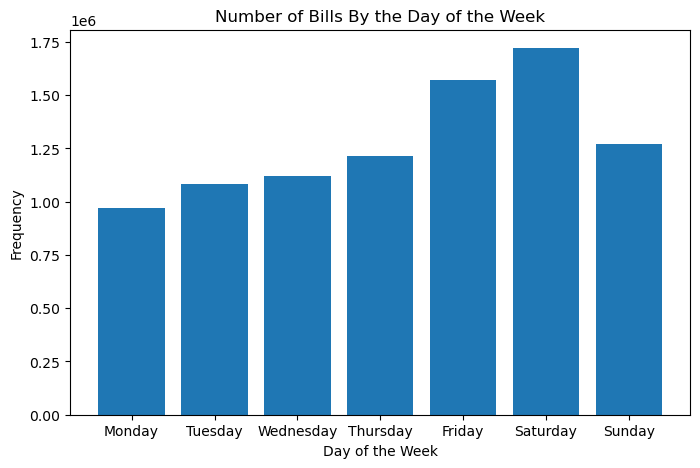

In [14]:
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(day_counts['Day'], day_counts['Count'])
plt.title('Number of Bills By the Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()